In [17]:
import pandas as pd
import numpy as np
col = ['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome','medianHouseValue']
cal_housing_raw = pd.read_csv('cal_housing.csv', header=None, names=col)

In [19]:
nycha = pd.read_pickle('NYCHA_Electricity_2010_to_2018_df_prorated_kwh_imputed')
nycha.head()

,Building_Meter,Month,Month_Type,Month_#_Days,Prorated_Days,Gap_Days,Gap_Type,Prorated_KWH,Imputed_KWH
0,165.0 - BLD 04_99273488,2009-12-01,First_Month,31,9.0,0.0,No Gap,19694.117647,67835.294118
1,165.0 - BLD 04_99273488,2010-01-01,Month_In_The_Middle,31,31.0,0.0,No Gap,68283.025210,68283.025210
2,165.0 - BLD 04_99273488,2010-02-01,Month_In_The_Middle,28,28.0,0.0,No Gap,61071.133005,61071.133005
3,165.0 - BLD 04_99273488,2010-03-01,Month_In_The_Middle,31,31.0,0.0,No Gap,58011.118077,58011.118077
4,165.0 - BLD 04_99273488,2010-04-01,Month_In_The_Middle,30,30.0,0.0,No Gap,55164.054336,55164.054336


In [20]:
nycha.groupby('Building_Meter').size()

Building_Meter
1.0 - BLD 01_7836716                        103
1.0 - BLD 01_7838586                        103
1.0 - BLD 02_7694040                        103
1.0 - BLD 03_7177432                        103
1.0 - BLD 04_7381828                        103
1.0 - BLD 04_8638820                         12
1.0 - BLD 05_6889487                        103
1.0 - BLD 06_6469176                        103
1.0 - BLD 07_7006908                         73
1.0 - BLD 07_8642492                         24
1.0 - NA_4880207                             38
10.0 - BLD 01_7864550                       102
10.0 - BLD 02_5648373                         2
10.0 - BLD 02_7864551                       102
10.0 - BLD 03_8010023                       102
10.0 - BLD 04_7864536                       102
10.0 - BLD 05_8010026                        22
10.0 - BLD 05_8163877                       101
10.0 - BLD 06_7864559                       102
10.0 - BLD 06_8163892                        99
10.0 - BLD 07_8010032    

In [21]:
#import statsmodels.api as sm
nycha_f = nycha[nycha['Building_Meter'] == '1.0 - BLD 01_7836716']
nycha_f.dtypes
df = nycha_f.copy()
nycha_f

,Building_Meter,Month,Month_Type,Month_#_Days,Prorated_Days,Gap_Days,Gap_Type,Prorated_KWH,Imputed_KWH
124270,1.0 - BLD 01_7836716,2009-12-01,First_Month,31,8.0,0.0,No Gap,212.363636,822.909091
124271,1.0 - BLD 01_7836716,2010-01-01,Month_In_The_Middle,31,31.0,0.0,No Gap,805.236364,805.236364
124272,1.0 - BLD 01_7836716,2010-02-01,Month_In_The_Middle,28,28.0,0.0,No Gap,680.606897,680.606897
124273,1.0 - BLD 01_7836716,2010-03-01,Month_In_The_Middle,31,31.0,0.0,No Gap,853.147942,853.147942
124274,1.0 - BLD 01_7836716,2010-04-01,Month_In_The_Middle,30,30.0,0.0,No Gap,715.645161,715.645161
124275,1.0 - BLD 01_7836716,2010-05-01,Month_In_The_Middle,31,31.0,0.0,No Gap,809.800000,809.800000
124276,1.0 - BLD 01_7836716,2010-06-01,Month_In_The_Middle,30,30.0,0.0,No Gap,698.400000,698.400000
124277,1.0 - BLD 01_7836716,2010-07-01,Month_In_The_Middle,31,31.0,0.0,No Gap,708.800000,708.800000
124278,1.0 - BLD 01_7836716,2010-08-01,Month_In_The_Middle,31,31.0,0.0,No Gap,780.000000,780.000000
124279,1.0 - BLD 01_7836716,2010-09-01,Month_In_The_Middle,30,30.0,0.0,No Gap,847.200000,847.200000


In [22]:
df.Timestamp = pd.to_datetime(df.Month,format='%Y-%m-%d') 
df.index = df.Timestamp 
df = df.resample('M', convention = 'start').mean()

In [23]:
df

,Month_#_Days,Prorated_Days,Gap_Days,Prorated_KWH,Imputed_KWH
Month,,,,,
2009-12-31,31,8.0,0.0,212.363636,822.909091
2010-01-31,31,31.0,0.0,805.236364,805.236364
2010-02-28,28,28.0,0.0,680.606897,680.606897
2010-03-31,31,31.0,0.0,853.147942,853.147942
2010-04-30,30,30.0,0.0,715.645161,715.645161
2010-05-31,31,31.0,0.0,809.800000,809.800000
2010-06-30,30,30.0,0.0,698.400000,698.400000
2010-07-31,31,31.0,0.0,708.800000,708.800000
2010-08-31,31,31.0,0.0,780.000000,780.000000


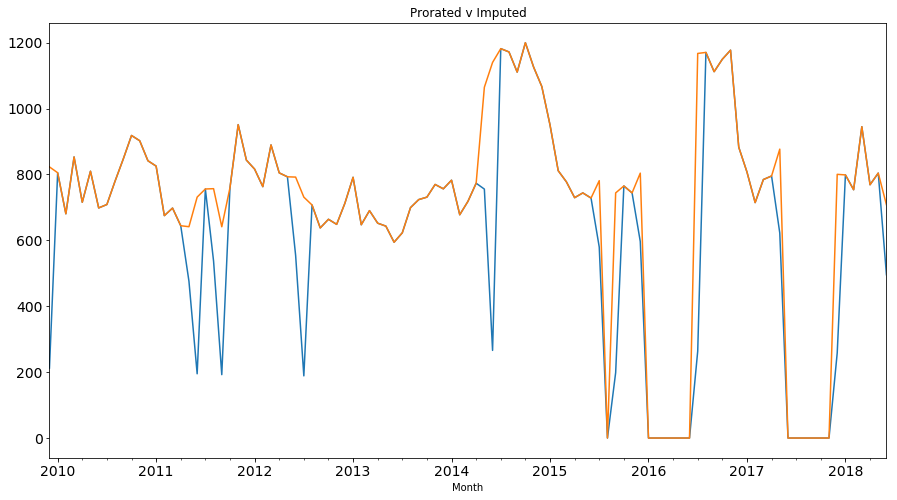

In [24]:
import matplotlib.pyplot as plt
df.Prorated_KWH.plot(figsize=(15,8), title= 'Prorated v Imputed', fontsize=14)
df.Imputed_KWH.plot(figsize=(15,8), title= 'Prorated v Imputed', fontsize=14)
plt.show()

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd = df['Imputed_KWH']

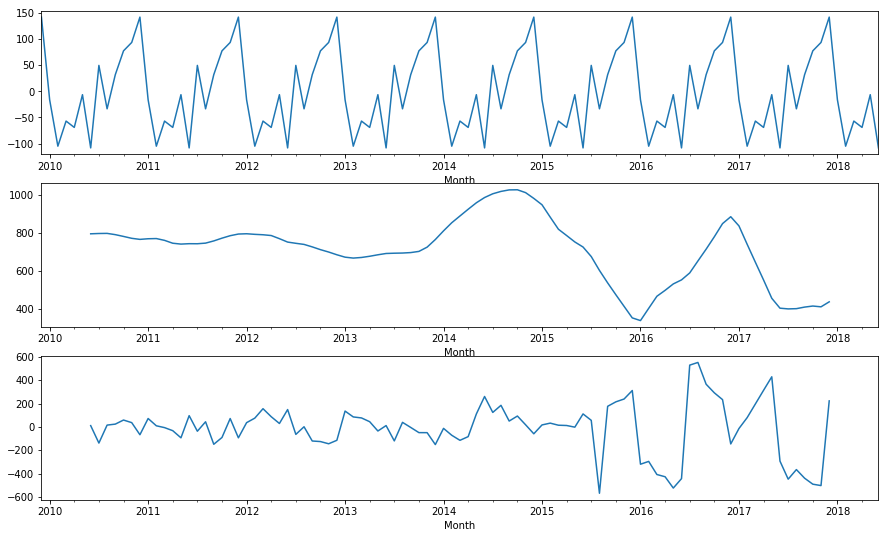

In [26]:
result = seasonal_decompose(sd, model='additive')
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,9))
result.seasonal.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.resid.plot(ax=ax3)
plt.show()

In [27]:
type(result)

statsmodels.tsa.seasonal.DecomposeResult

In [28]:
df.dtypes

Month_#_Days       int64
Prorated_Days    float64
Gap_Days         float64
Prorated_KWH     float64
Imputed_KWH      float64
dtype: object

In [ ]:
#from datetime import datetime
#df[df[datetime.strftime(pd.to_datetime(df.Month),'%m') == '01']]

In [ ]:
df.dtypes

In [30]:
df = df.reset_index()
df['Month_no'] = pd.DatetimeIndex(df['Month']).month

In [31]:
df[df['Month_no'] == 3]['Imputed_KWH']

3     853.147942
15    697.948832
27    889.668521
39    690.206897
51    718.344828
63    777.517241
75      0.000000
87    784.538376
99    944.996663
Name: Imputed_KWH, dtype: float64

In [32]:
hwinter = df.copy()
hwinter = hwinter.drop(['Prorated_Days','Gap_Days','Prorated_KWH','Month_no','Month_#_Days'],axis=1)

In [33]:
hwinter.set_index('Month')

,Imputed_KWH
Month,
2009-12-31,822.909091
2010-01-31,805.236364
2010-02-28,680.606897
2010-03-31,853.147942
2010-04-30,715.645161
2010-05-31,809.800000
2010-06-30,698.400000
2010-07-31,708.800000
2010-08-31,780.000000


In [105]:
hwinter_tr = hwinter[pd.DatetimeIndex(hwinter['Month']).year < 2018]
hwinter_te = hwinter[pd.DatetimeIndex(hwinter['Month']).year == 2018]

In [155]:
# handling 0 values in the data
# replace the 0s with NAN and use the interpolate function in pandas to impute the missing value.
hwinter_tr = hwinter_tr.replace(0, np.nan)
mon,ikwh = hwinter_tr['Month'],hwinter_tr['Imputed_KWH']
index = pd.DatetimeIndex(mon,freq = 'M',yearfirst=True)
data = pd.Series(ikwh.values, index)
data.index = pd.DatetimeIndex(data.index, freq=pd.infer_freq(data.index))
data.interpolate(method='time', inplace=True)

In [156]:
data

Month
2009-12-31     822.909091
2010-01-31     805.236364
2010-02-28     680.606897
2010-03-31     853.147942
2010-04-30     715.645161
2010-05-31     809.800000
2010-06-30     698.400000
2010-07-31     708.800000
2010-08-31     780.000000
2010-09-30     847.200000
2010-10-31     918.348387
2010-11-30     902.322581
2010-12-31     841.583578
2011-01-31     825.345455
2011-02-28     674.993103
2011-03-31     697.948832
2011-04-30     644.395996
2011-05-31     641.379310
2011-06-30     731.250000
2011-07-31     755.896552
2011-08-31     756.827586
2011-09-30     641.250000
2011-10-31     759.762931
2011-11-30     951.216908
2011-12-31     843.554252
2012-01-31     816.290909
2012-02-29     762.993548
2012-03-31     889.668521
2012-04-30     804.827586
2012-05-31     792.910345
                 ...     
2015-07-31     781.200000
2015-08-31     762.295082
2015-09-30     744.000000
2015-10-31     765.083871
2015-11-30     744.000000
2015-12-31     804.000000
2016-01-31     856.876153
2016-0

In [157]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(data, trend = 'add', seasonal = 'add', seasonal_periods = 12).fit()
pred = model.predict(start=hwinter_te.index[0], end=hwinter_te.index[-1])

In [158]:
pred

2018-01-31    767.813386
2018-02-28    650.816145
2018-03-31    725.281080
2018-04-30    690.623218
2018-05-31    731.366678
2018-06-30    678.360221
Freq: M, dtype: float64

In [159]:
hwinter_te

,Month,Imputed_KWH
97,2018-01-31,798.618182
98,2018-02-28,753.651613
99,2018-03-31,944.996663
100,2018-04-30,768.827586
101,2018-05-31,804.124138
102,2018-06-30,708.000000


In [160]:
# calculating the rmse
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(hwinter_te['Imputed_KWH'], pred))

In [161]:
rms

109.61074638153988

In [242]:
# using the prophet library from facebook for forecasting
from fbprophet import Prophet
# the input has to be a dataframe with 2 columns ds and y
proptest = data.copy()
proptest = pd.DataFrame(proptest, columns=['y'])
proptest.reset_index(inplace=True)
proptest.columns = ['ds','y']
# log transforming the y values to make it stationary
#proptest['y_orig'] = proptest['y']
#proptest['y'] = np.log(proptest['y'])
proptest

,ds,y
0,2009-12-31,822.909091
1,2010-01-31,805.236364
2,2010-02-28,680.606897
3,2010-03-31,853.147942
4,2010-04-30,715.645161
5,2010-05-31,809.800000
6,2010-06-30,698.400000
7,2010-07-31,708.800000
8,2010-08-31,780.000000
9,2010-09-30,847.200000


In [243]:
# fitting the model
model = Prophet()
model.fit(proptest)
# forecasting for 2018
future_data = model.make_future_dataframe(periods=6, freq = 'm')
predicted = model.predict(future_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [244]:
predicted[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2009-12-31,747.631047,583.609430,924.203285
1,2010-01-31,751.577346,591.105403,928.369993
2,2010-02-28,656.714912,490.378502,820.433623
3,2010-03-31,718.649541,544.654550,893.673824
4,2010-04-30,687.845185,517.691550,850.834895


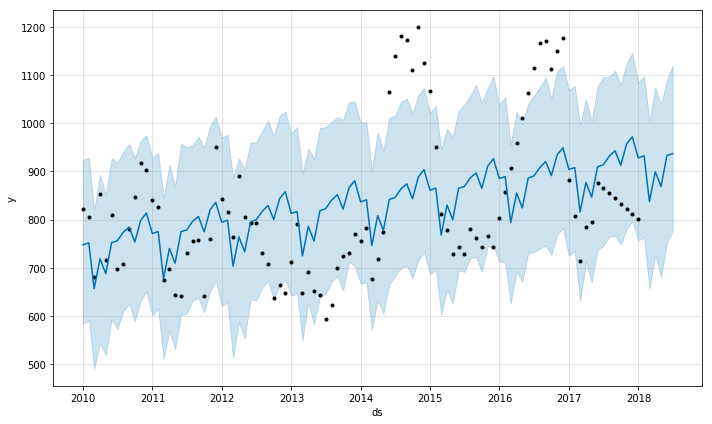

In [245]:
# plotting the predicted against actual values - black dots are actual, line is predicted
model.plot(predicted)

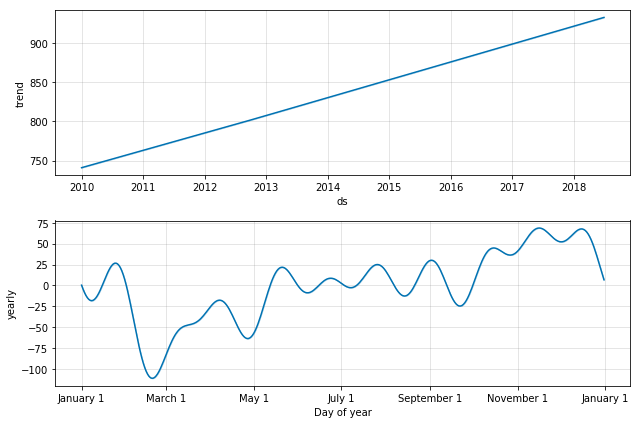

In [246]:
# splitting it into trend and seasonality
model.plot_components(predicted)

In [229]:
# transforming the log transformed values back to original scale and plotting
predicted_cop = predicted.copy()
predicted_cop['yhat'] = np.exp(predicted_cop['yhat'])
predicted_cop['yhat_lower'] = np.exp(predicted_cop['yhat_lower'])
predicted_cop['yhat_upper'] = np.exp(predicted_cop['yhat_upper'])

In [237]:
predicted_cop[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2009-12-31,801.399436,669.530643,964.467155
1,2010-01-31,798.790396,665.330566,955.246241
2,2010-02-28,705.426050,588.885890,842.930349
3,2010-03-31,760.745402,639.030342,922.537061
4,2010-04-30,726.573672,615.882519,872.039313


In [ ]:
proptest['y_log'] = proptest['y']
proptest['y'] = proptest['y_orig']
model.plot(predicted_cop)

In [256]:
# actual vs predicted
actvpred = predicted[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)
actvpred['y_orig'] = hwinter_te['Imputed_KWH']
actvpred['Anomaly'] = np.where((actvpred['y_orig'] >= actvpred['yhat_lower']) & (actvpred['y_orig'] <= actvpred['yhat_upper']), 'No', 'Yes')
actvpred

,ds,yhat,yhat_lower,yhat_upper,y_orig,Anomaly
97,2018-01-31,932.236433,762.464243,1097.541813,798.618182,No
98,2018-02-28,837.424255,656.158525,1005.213273,753.651613,No
99,2018-03-31,899.414524,727.686410,1074.363672,944.996663,No
100,2018-04-30,868.664013,680.407862,1039.410221,768.827586,No
101,2018-05-31,933.088384,751.949104,1090.231895,804.124138,No
102,2018-06-30,936.872910,776.488718,1118.959711,708.000000,Yes
